### Read all the images

In [1]:
from PIL import Image
import glob
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits import mplot3d

In [2]:
image_list = []
num_folders = 68
image_size = 32
base_path = 'PIE'
images = np.zeros((0,image_size,image_size),dtype=np.int8)
labels = np.zeros((0),dtype=np.int8)
for i in range(num_folders):
    folder_name = os.path.join(base_path, str(i+1),'*.jpg')
    for filename in glob.glob(folder_name):
        im=np.asarray(Image.open(filename))
        images = np.append(images, [im], axis=0)
        labels = np.append(labels, [i+1], axis=0)

### Randomly select 500 images

In [3]:
num_images = len(images)
np.random.seed(99)
select_num = 500
rand_images_list = np.random.randint(0, num_images, select_num)
X = images[rand_images_list].reshape([select_num, image_size*image_size])
y = labels[rand_images_list]

### PCA

In [81]:
def PCA(X):
    mean_data = np.mean(X,axis=0)
    centred_data = X - mean_data
    cov_matrix = np.cov(centred_data.T)
    [eig_val,eig_vec] = np.linalg.eig(cov_matrix)
    projected = np.dot(eig_vec, centred_data.T)
    return eig_val,eig_vec,projected

In [82]:
eig_val,eig_vec,projected = PCA(X)

### Eigenfaces

In [82]:
def get_eigenface(eig_vec, i):
    return eig_vec[:,i].real.reshape([image_size,image_size])

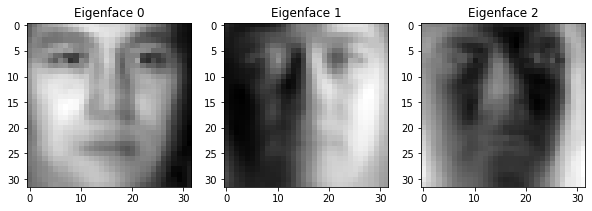

In [133]:
num_eig_faces = 3
fig=plt.figure(figsize=(10, 10))
for i in range(num_eig_faces):
    eig_face = get_eigenface(eig_vec, i)
    ax = fig.add_subplot(1, num_eig_faces, i+1)
    ax.title.set_text('Eigenface '+str(i))
    plt.imshow(eig_face,cmap='gray')
plt.show()

### Visualise 2D and 3D

In [163]:
sorted_eig_index = np.argsort(eig_val)[::-1]

In [164]:
pca_2d_vec = eig_vec[:,sorted_eig_index[0:2]]
pca_3d_vec = eig_vec[:,sorted_eig_index[0:3]]

In [167]:
pca_2d = np.dot(X, pca_2d_vec)
pca_3d = np.dot(X, pca_3d_vec)

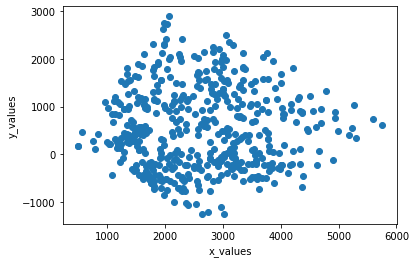

In [168]:
plt.plot(pca_2d[:,0].real, pca_2d[:,1].real, 'o')
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.show()

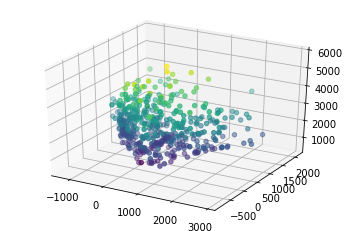

In [173]:
ax = plt.axes(projection='3d')

zdata = pca_3d[:,0].real
xdata = pca_3d[:,1].real
ydata = pca_3d[:,2].real
ax.scatter3D(xdata, ydata, zdata, c=zdata);

In [176]:
### Classifying the test images using the rule of nearest neighbor